In [4]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

<h1>ONLY NEED CODE FROM HERE DOWN</h1>

In [5]:
append_owid = pd.read_csv("final_append.csv")
append_owid = append_owid.drop(["Unnamed: 0", "Unnamed: 0.1", "index", "iso_code"], axis=1)
temp = append_owid[[f"gas_production", f"oil_production", f"coal_production"]]
append_owid[f'fossil_production'] = temp.sum(axis=1)

In [6]:
final = pd.read_csv("final_w_rd.csv")
final = final.set_index(final['Unnamed: 0'])
final.index.name=None
final = final.drop(['Unnamed: 0', 'Africa_ghg.1'], axis=1)

In [36]:
def graphFossilP(country):
    #production in terrawatt hours
    temp = final[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp = temp.sum(axis=1)
    temp.plot()

def graphCleanP(energy, country):
    #terwatt hours
    final[f'{energy}_electricity_{country}'].plot()

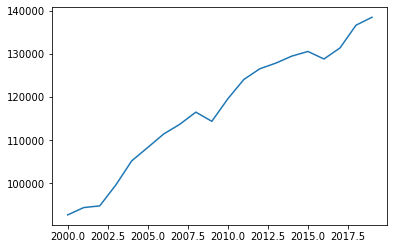

In [37]:
graphFossilP("World")

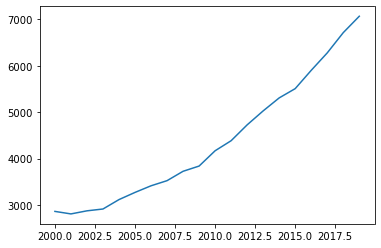

In [38]:
graphCleanP("renewables", "World")

<h3>Is the reduction in fossil fuel consumption related to a decrease in fossil fuel production</h3>

In [1038]:
c_vs_p = final

def graph_C_vs_P(country):
    temp = c_vs_p[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'fossil_consumption_{country}'] = c_vs_p[[f"fossil_fuel_consumption_{country}"]]
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'fossil_consumption_{country}')

<AxesSubplot:xlabel='fossil_production', ylabel='fossil_fuel_consumption'>

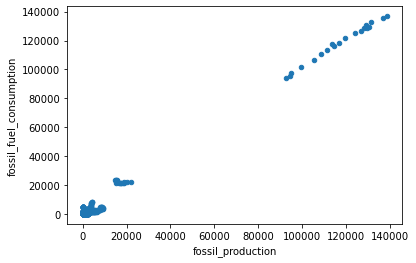

In [29]:
#all data
temp = append_owid[[f"gas_production", f"oil_production", f"coal_production"]]
append_owid[f'fossil_production'] = temp.sum(axis=1)
append_owid.plot(kind="scatter", x="fossil_production", y="fossil_fuel_consumption")

<AxesSubplot:xlabel='fossil_production', ylabel='renewables_electricity'>

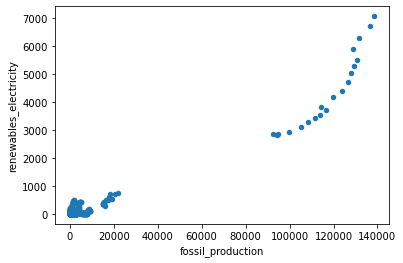

In [39]:
append_owid.plot(kind="scatter", x="fossil_production", y="renewables_electricity")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


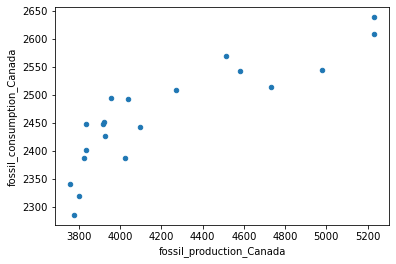

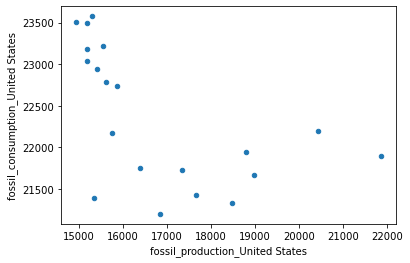

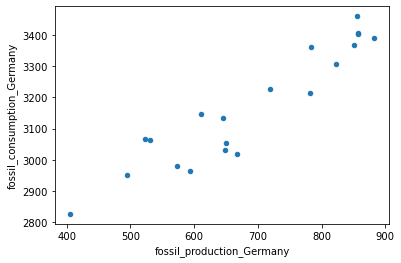

In [1040]:
graph_C_vs_P("Canada")
graph_C_vs_P("United States")
graph_C_vs_P("Germany")

<h3>Is fossil fuel production reduction correlated with clean energy production or consumption</h3>

In [1109]:
fossilP_vs_cleanP = final

def graphFossilP_vs_cleanP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_production_{country}'] = fossilP_vs_cleanP[[f"renewables_electricity_{country}"]]
    temp.plot(kind="scatter", x=f'clean_production_{country}', y=f"fossil_production_{country}")
    return temp

def graphFossilP_vs_cleanC(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_consumption_{country}'] = fossilP_vs_cleanP[[f"renewables_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'clean_consumption_{country}', y=f"fossil_production_{country}")
    return temp

#which clean energy helps reduce fossil fuel consumption
def graphFossilP_vs_C(energy, country, ending):
    if ending:
        ending = f"_{country}"
    else:
        ending = ""
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production{ending}'] = temp.sum(axis=1)
    temp[f'fossil_production{ending}'] = temp[f'fossil_production{ending}']
    temp[f'{energy}_consumption{ending}'] = fossilP_vs_cleanP[[f"{energy}_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'{energy}_consumption{ending}', y=f"fossil_production{ending}")
    return temp

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='solar_consumption', ylabel='fossil_production'>

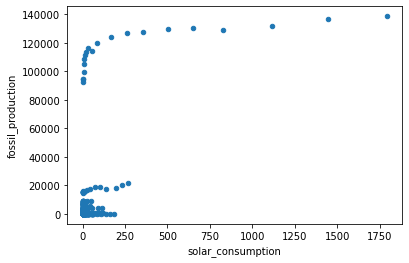

In [16]:
#all data
energy = "solar"
temp = append_owid[[f"{energy}_consumption"]]
temp["fossil_production"] = append_owid["fossil_production"]
temp["fossil_consumption"] = append_owid["fossil_fuel_consumption"]
temp = temp.dropna()
temp.plot(kind="scatter", x=f"{energy}_consumption", y="fossil_production")

<AxesSubplot:xlabel='renewables_consumption', ylabel='co2'>

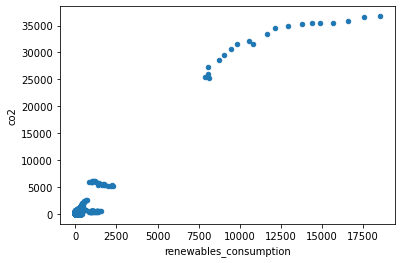

In [44]:
energy = "renewables"
temp = append_owid[[f"{energy}_consumption", "co2"]]
temp.plot(kind="scatter", x=f"{energy}_consumption", y="co2")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

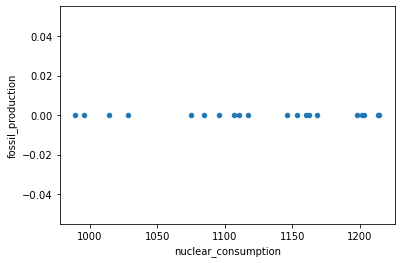

In [940]:
# graphFossilP_vs_cleanC("Canada")
# graphFossilP_vs_cleanC("United States")
# graphFossilP_vs_cleanC("China")
x = graphFossilP_vs_C("nuclear", "France", False)

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


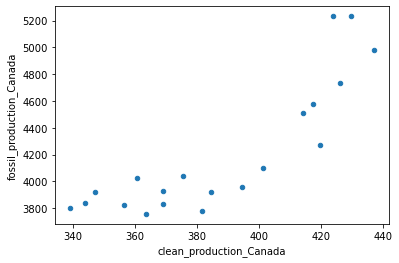

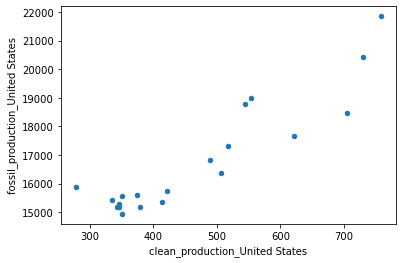

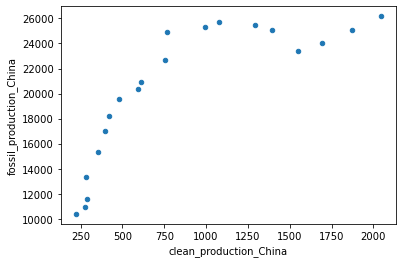

In [869]:
graphFossilP_vs_cleanP("Canada")
graphFossilP_vs_cleanP("United States")
graphFossilP_vs_cleanP("China")

<h3>Is clean energy production or consumption correlated with investment into R&D</h3>

<AxesSubplot:xlabel='rd', ylabel='renewables_electricity'>

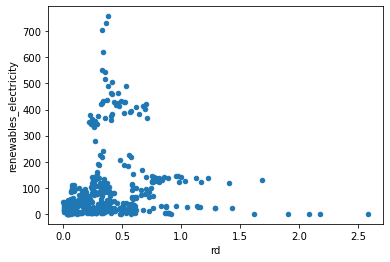

In [7]:
temp = append_owid
temp = temp.dropna(subset=['rd'])
temp = temp[temp.rd != 0]
temp.plot(kind="scatter", x="rd", y="renewables_electricity")

In [13]:
def rd_vs_production(energy, country):
    temp = final[[f'{energy}_electricity_{country}', f'{country}_r&d']]
    temp.plot(kind="scatter", x=f'{country}_r&d', y=f'{energy}_electricity_{country}')

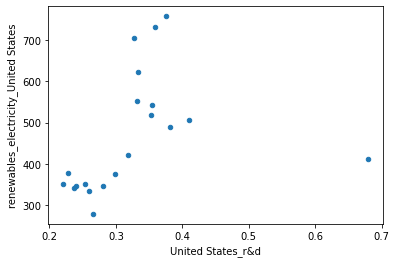

In [14]:
rd_vs_production("renewables", "United States")

<h3>Production to Consumption Ratio</h3>

In [ ]:
ratio = final

non_clean_energy = ["coal", "oil", "gas", "fossil"]
def p_vs_c_ratio(energy, country):
    if(energy in non_clean_energy):
        if(energy == "fossil"):
            temp = ratio[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
            temp[f'fossil_production_{country}'] = temp.sum(axis=1)
            temp[f'{energy}_consumption_{country}'] = ratio[[f"fossil_fuel_consumption_{country}"]]
            temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'{energy}_consumption_{country}')
        else:
            temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_production_{country}"]]
            temp.plot(kind="scatter", x=f"{energy}_production_{country}", y=f'{energy}_consumption_{country}')
    else:
        temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_electricity_{country}"]]
        temp.plot(kind="scatter", x=f"{energy}_electricity_{country}", y=f'{energy}_consumption_{country}')



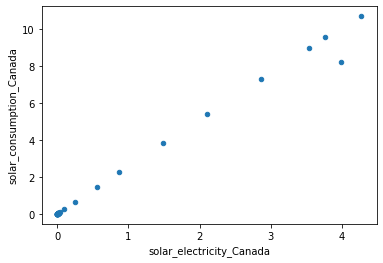

In [875]:
p_vs_c_ratio("solar", "Canada")

<h3>What renewable energy reduces fossil fuel production the most</h3>

In [26]:
file = final

def intensityC_vs_fossilP(energy, country):
    #fossil fuel production
    temp = file[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)

    #energy intensity
    temp[f'{energy}_electricity_{country}'] = file[f'{energy}_electricity_{country}'] / file[f"gdp_{country}"]
    temp.plot(kind="scatter", x=f"{energy}_electricity_{country}", y=f'fossil_production_{country}')
    

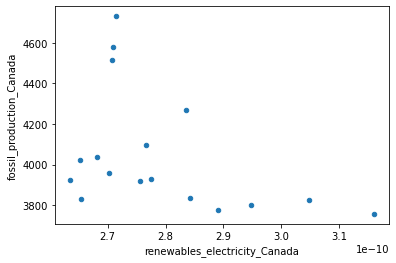

In [27]:
intensityC_vs_fossilP("renewables", "Canada")

<h3>Does a reduction in fossil fuels consumption correlate to a reduction in GHG</h3>

In [ ]:
fossil_vs_co2 = final

def calc_fossil_vs_ghg(country):
    temp = fossil_vs_co2[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'co2_{country}'] = fossil_vs_co2[[f"co2_{country}"]]
    nancount = 0
    for i in range(temp.shape[1]):
        if(temp.iat[i, 3] == 0 or temp.iat[i, 4]==0):
            nancount += 1
            
    if nancount >= 4:
        return;
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'co2_{country}')
    

In [16]:
clone = final
avail = []
owidSet = {"Afghanistan"}
ghgSet = {"Afghanistan"}
owid2 = pd.read_csv("Macro/owid-energy-data.csv")

def owidList():
    for i in range(owid2.shape[0]):
        owidSet.add(owid2.iat[i, 1])

        
def ghgList():
    toRemove = []
    for c in owidSet:
        try:
            subset = final[f"{c}_ghg"]
        except KeyError:
            toRemove.append(c)
            
    
    for c in owidSet:
        if c not in toRemove:
            avail.append(c)
    
    avail.sort()
    
    

In [17]:
owidList()
ghgList()
print(avail)

['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Niger

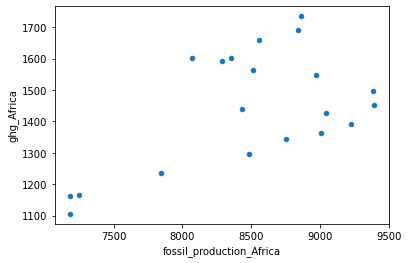

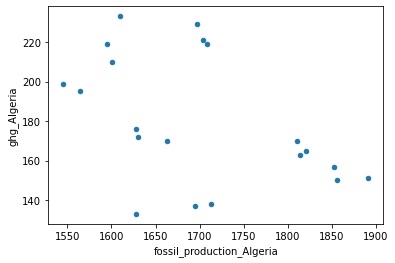

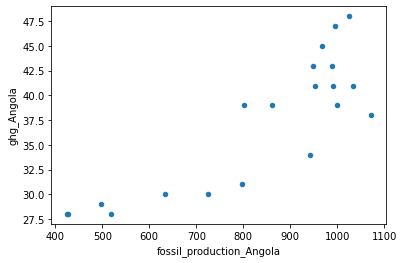

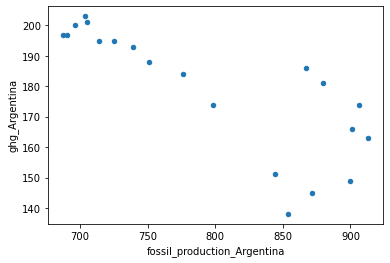

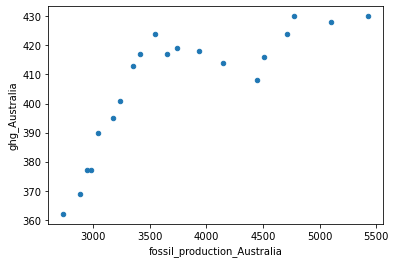

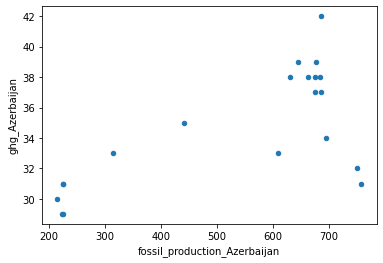

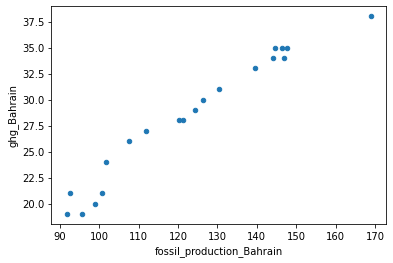

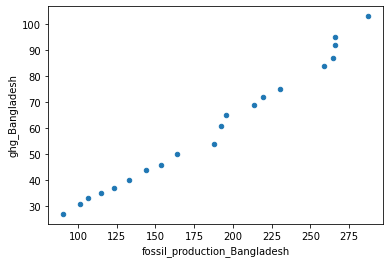

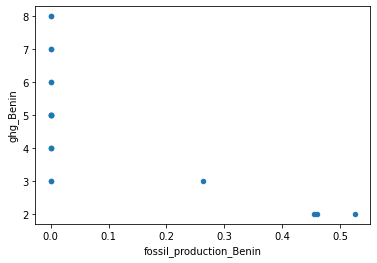

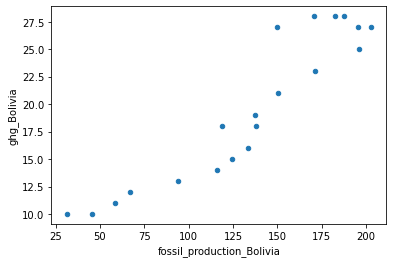

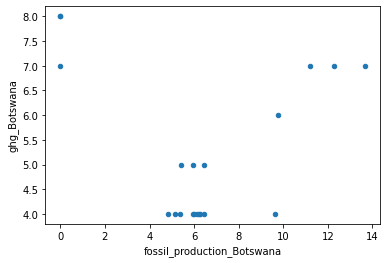

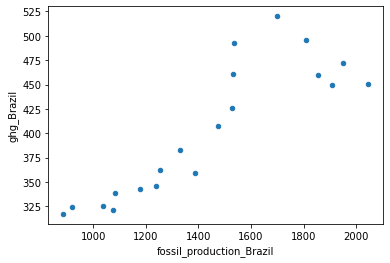

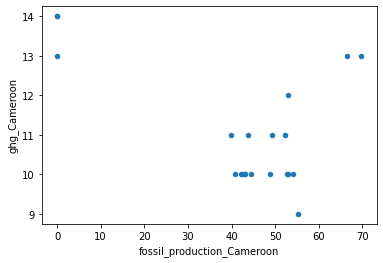

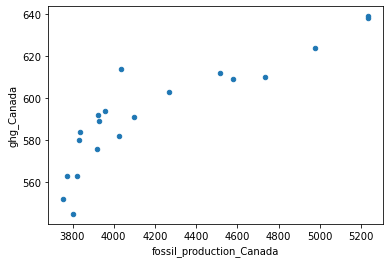

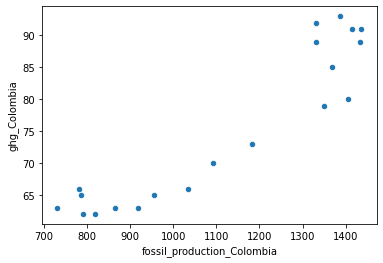

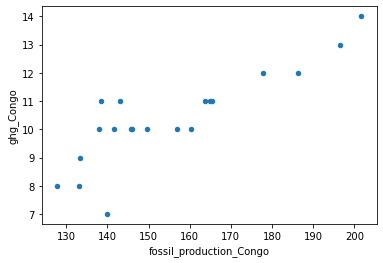

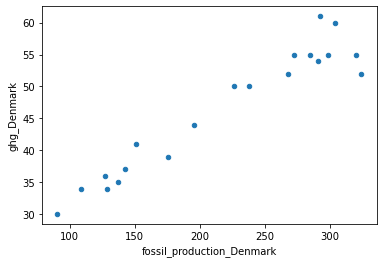

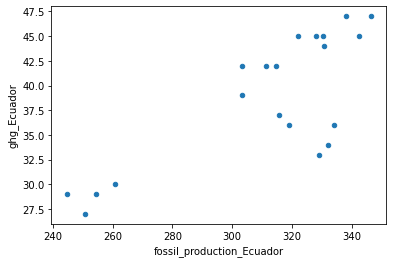

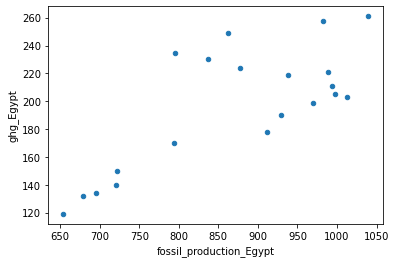

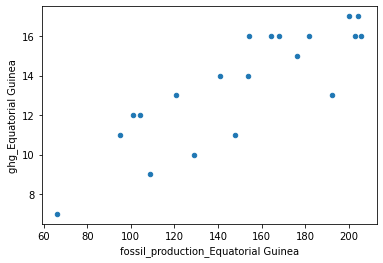

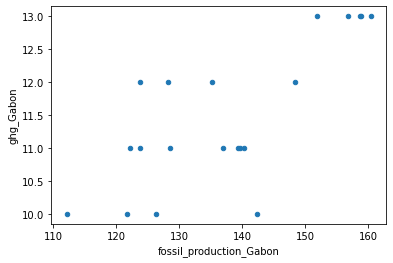

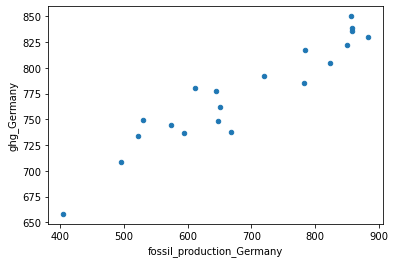

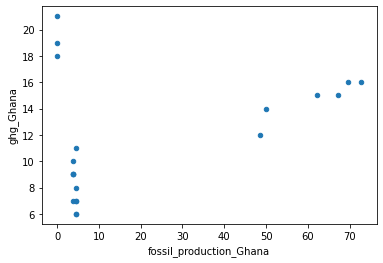

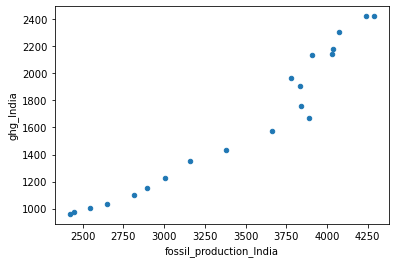

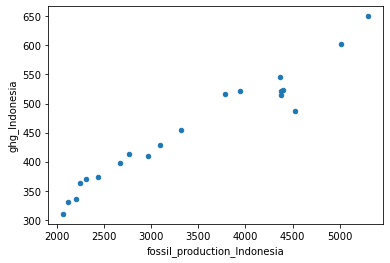

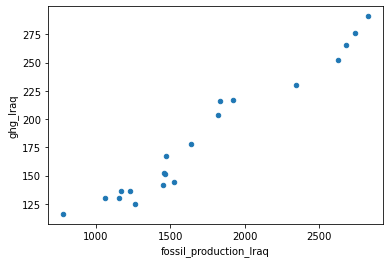

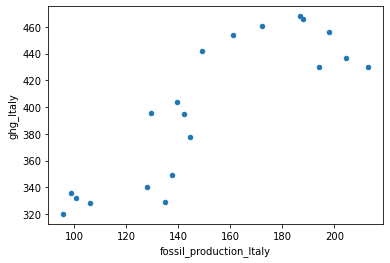

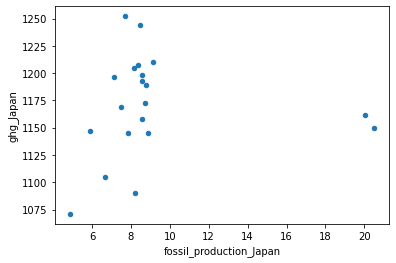

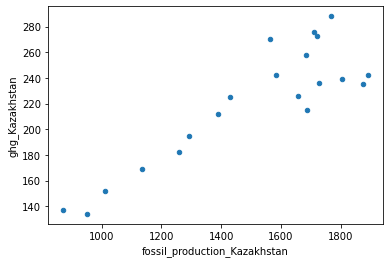

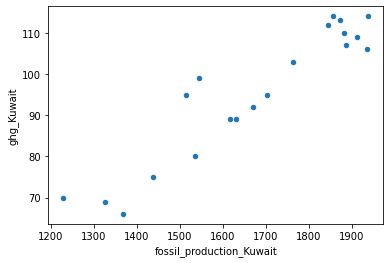

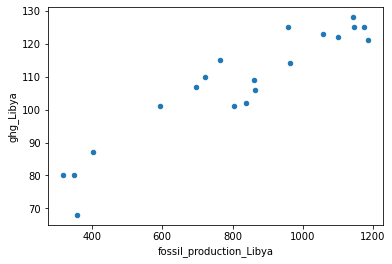

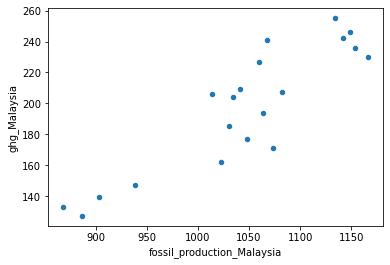

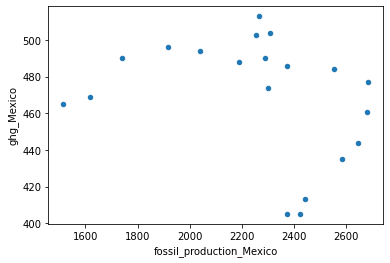

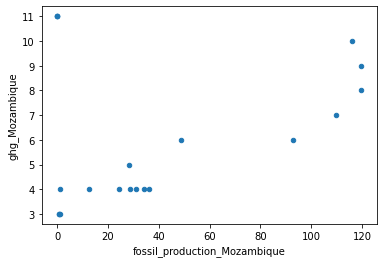

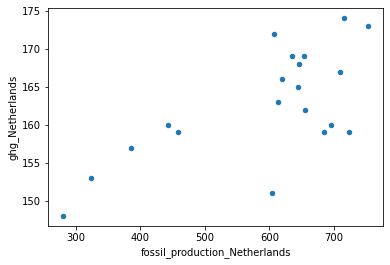

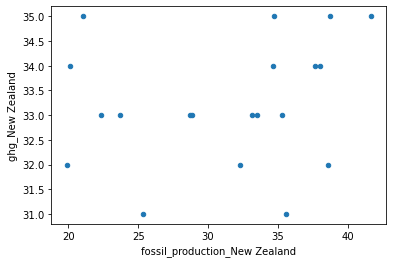

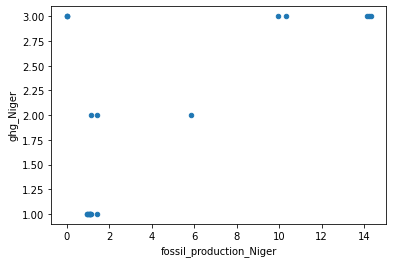

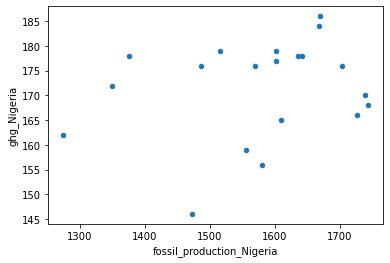

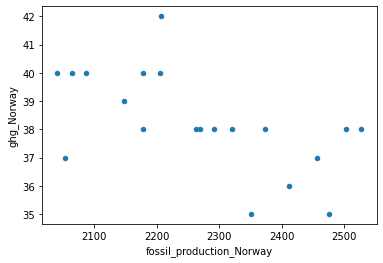

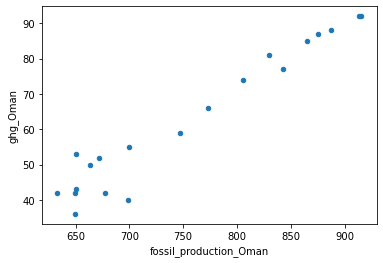

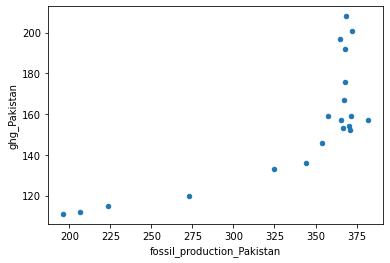

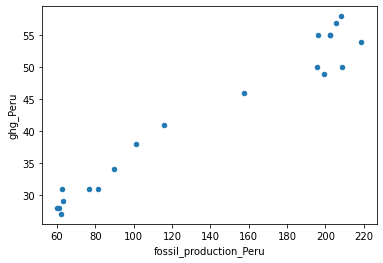

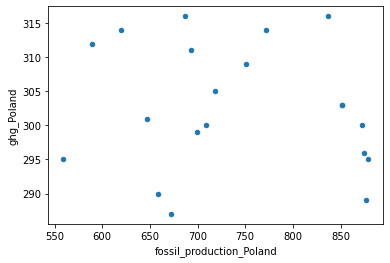

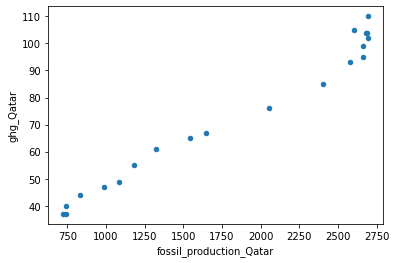

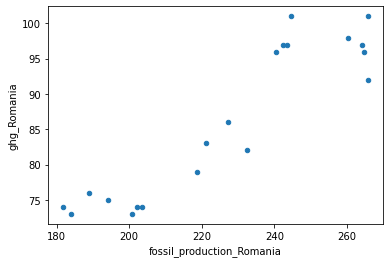

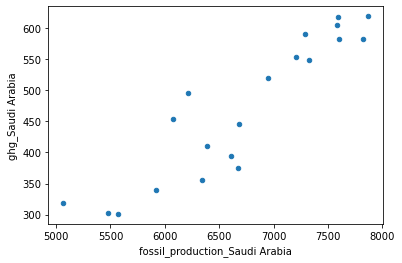

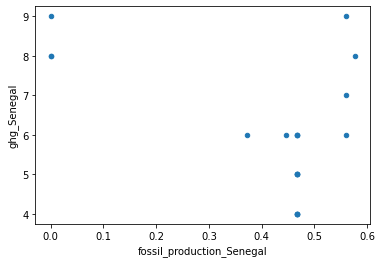

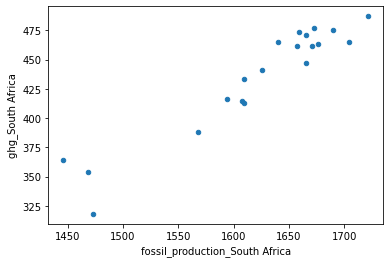

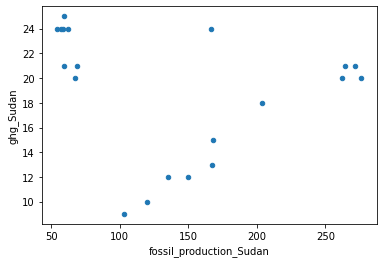

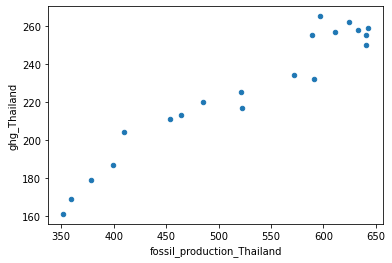

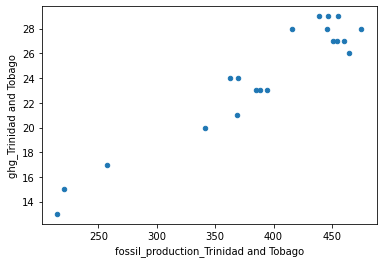

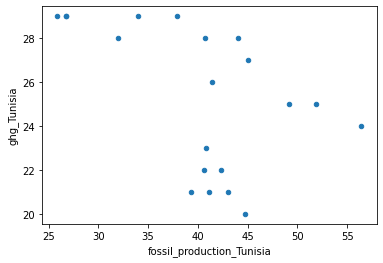

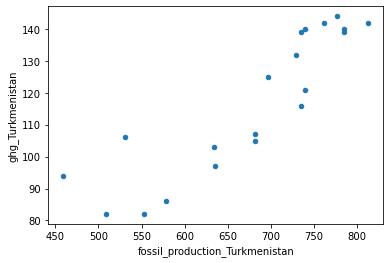

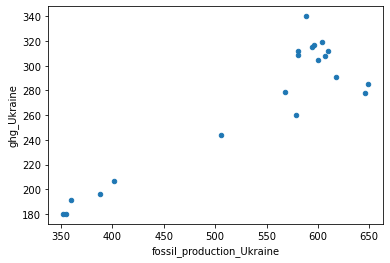

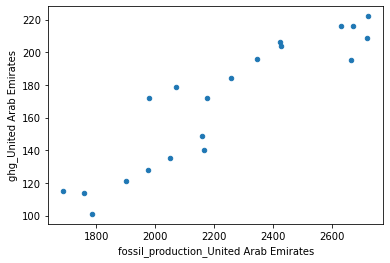

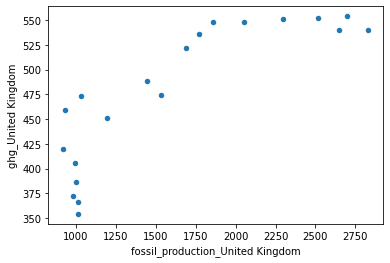

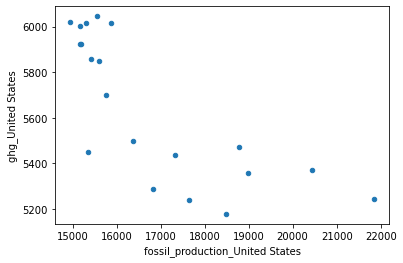

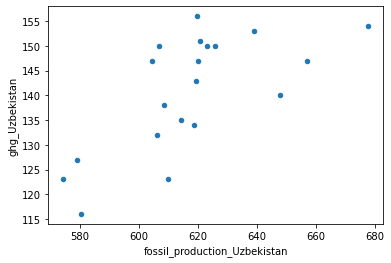

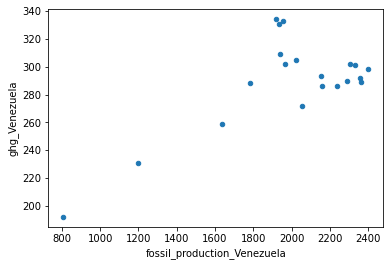

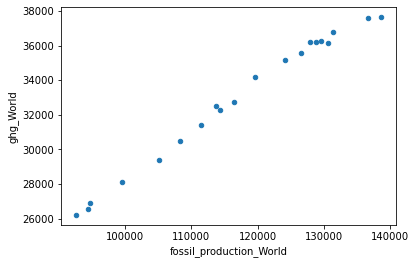

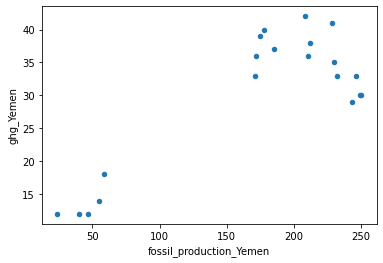

In [18]:
import warnings
warnings.filterwarnings('ignore')

for country in avail:
    calc_fossil_vs_ghg(country)